In [ ]:
!pip install tensorflow numpy matplotlib seaborn opencv-python


In [1]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git


Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [2]:
import os
os.listdir("Face-Mask-Detection/dataset")


['without_mask', 'with_mask']

# Preparing Data

In [4]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Image size
IMG_SIZE = 128
categories = ["with_mask", "without_mask"]

# Data and labels storage
data = []
labels = []

# Load images manually
for category in categories:
    path = os.path.join("Face-Mask-Detection/dataset", category)
    label = categories.index(category)  # 0 = with_mask, 1 = without_mask

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            pass

# Convert to NumPy arrays
data = np.array(data) / 255.0
labels = np.array(labels)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42)  # 80% Train, 20% Temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split 20% into 10% Val & 10% Test

# Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)


In [5]:

# performing trnsformations such as rotation and zoom to achive invariance
train_datagen = ImageDataGenerator(
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

val_datagen = ImageDataGenerator()  # No augmentation for validation & test

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = val_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


different number of layers


Training Model 0...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.7297 - loss: 0.5534 - val_accuracy: 0.8998 - val_loss: 0.2789
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8585 - loss: 0.3639 - val_accuracy: 0.9144 - val_loss: 0.2406
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.8804 - loss: 0.3202 - val_accuracy: 0.9413 - val_loss: 0.2032
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.8727 - loss: 0.3178 - val_accuracy: 0.9169 - val_loss: 0.2438
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8827 - loss: 0.3032 - val_accuracy: 0.9389 - val_loss: 0.1762
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8989 - loss: 0.2746 - val_accuracy: 0.9291 - val_loss: 0.2073
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8734 - loss: 0.3135 - val_accuracy: 0.9267 - val_loss: 0.1888
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9017 - loss: 0

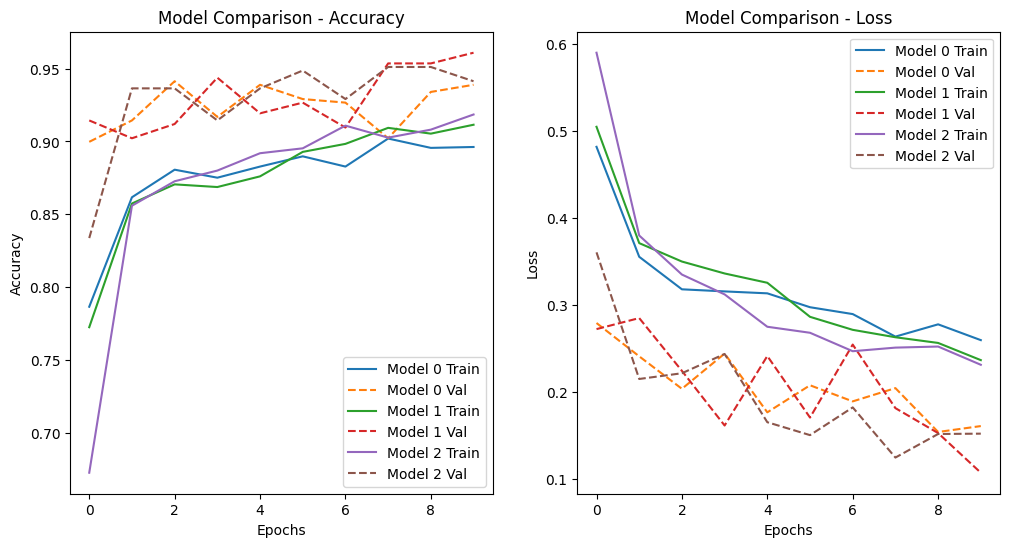

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model configurations
model_configs = [
    [(32, (3,3)), (64, (3,3)), (128, (3,3))],  # Model 0
    [(32, (3,3)), (64, (3,3)), (128, (3,3)), (128, (3,3))],  # Model 1
    [(32, (3,3)), (64, (3,3)), (128, (3,3)), (128, (3,3)), (128, (3,3))]  # Model 2
]

histories = []
trained_models = []  # Store trained models for evaluation

for i, config in enumerate(model_configs):
    print(f"\nTraining Model {i}...\n")

    # Define model
    model = Sequential()
    model.add(Conv2D(config[0][0], config[0][1], activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

    for filters, kernel_size in config[1:]:
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(filters, kernel_size, activation='relu'))

    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))


    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)
    histories.append(history)
    trained_models.append(model)  # Store the trained model
    print(f"\n***************stored the model{i}...********************\n")

###########Plots to compare ##########
plt.figure(figsize=(12, 6))
labels = ["Model 0", "Model 1", "Model 2"]

# Plot Accuracy
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f"{labels[i]} Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{labels[i]} Val")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Comparison - Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"{labels[i]} Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{labels[i]} Val")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Comparison - Loss')

plt.show()


different learning rates

In [ ]:
test_accuracies = []

for i, model in enumerate(trained_models):
    print(f"\nEvaluating Model {i} on Test Data...\n")
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    test_accuracies.append(test_acc)
    print(f"Model {i} - Test Accuracy: {test_acc:.4f}")




Evaluating Model 0 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9524 - loss: 0.1250
Model 0 - Test Accuracy: 0.9463

Evaluating Model 1 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9524 - loss: 0.1180
Model 1 - Test Accuracy: 0.9537

Evaluating Model 2 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9379 - loss: 0.1420
Model 2 - Test Accuracy: 0.9341


Training Model 0  with Adam, LR=0.001, Batch=32...
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.7083 - loss: 0.5652 - val_accuracy: 0.9022 - val_loss: 0.2947
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8421 - loss: 0.3954 - val_accuracy: 0.9242 - val_loss: 0.2301
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8635 - loss: 0.3608 - val_accuracy: 0.9487 - val_loss: 0.1988
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8805 - loss: 0.3081 - val_accuracy: 0.9315 - val_loss: 0.2167
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.8920 - loss: 0.2976 - val_accuracy: 0.9364 - val_loss: 0.2000
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.9061 - loss: 0.2675 - val_accuracy: 0.9340 - val_loss: 0.1982
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.8930 - loss: 0.2735 - val_accuracy: 0.9462 - val_loss: 0.1776
Epoch 8/10
103/103 ━━━━━━━━━━━━━

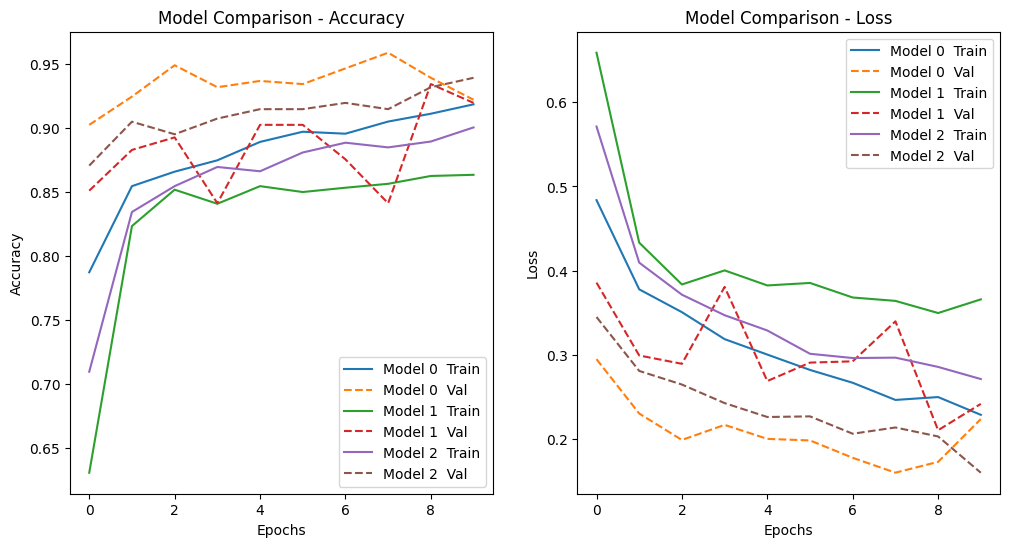

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

model_configs = [
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 32, "optimizer": Adam, "name": "Model 0 "},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.005, "batch_size": 32, "optimizer": Adam, "name": "Model 1 "},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.0001, "batch_size": 32, "optimizer": Adam, "name": "Model 2 "}
]

models = []
histories = []
trained_models = []

# Loop to create, compile, and train models
for config in model_configs:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(2, 2))

    for filters in config["layers"][1:]:
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    optimizer = config["optimizer"](learning_rate=config["learning_rate"])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training {config['name']} with {config['optimizer'].__name__}, LR={config['learning_rate']}, Batch={config['batch_size']}...")
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=config["batch_size"])

    models.append(model)
    histories.append(history)
    trained_models.append(model)  # Store the trained model
    print(f"\n***************stored the model{i}...********************\n")


# ====================  PLOT COMPARISON ====================
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Comparison - Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Comparison - Loss')

plt.show()


In [ ]:
test_accuracies = []

for i, model in enumerate(trained_models):
    print(f"\nEvaluating Model {i} on Test Data...\n")
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    test_accuracies.append(test_acc)
    print(f"Model {i} - Test Accuracy: {test_acc:.4f}")




Evaluating Model 0 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9236 - loss: 0.1978
Model 0 - Test Accuracy: 0.9268

Evaluating Model 1 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9269 - loss: 0.1939
Model 1 - Test Accuracy: 0.9244

Evaluating Model 2 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9124 - loss: 0.1866
Model 2 - Test Accuracy: 0.9195


different optimizers

Training Model 0 (Adam) with Adam, LR=0.001, Batch=32...
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.6869 - loss: 0.5647 - val_accuracy: 0.8851 - val_loss: 0.3322
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8602 - loss: 0.3683 - val_accuracy: 0.9242 - val_loss: 0.2327
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.8694 - loss: 0.3397 - val_accuracy: 0.9315 - val_loss: 0.2183
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8723 - loss: 0.3312 - val_accuracy: 0.9291 - val_loss: 0.2336
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8786 - loss: 0.3063 - val_accuracy: 0.9364 - val_loss: 0.2070
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8970 - loss: 0.2921 - val_accuracy: 0.9193 - val_loss: 0.1919
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.8979 - loss: 0.2737 - val_accuracy: 0.9462 - val_loss: 0.1663
Epoch 8/10
103/103 ━━━━━━━

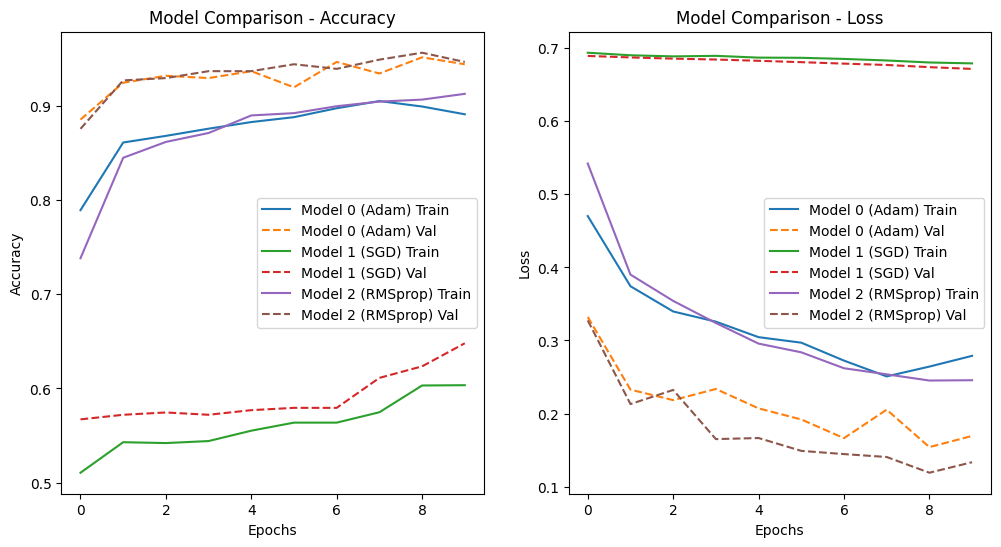

In [ ]:
model_configs = [
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 32, "optimizer": Adam, "name": "Model 0 (Adam)"},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 32, "optimizer": SGD, "name": "Model 1 (SGD)"},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 32, "optimizer": RMSprop, "name": "Model 2 (RMSprop)"}
]

models = []
histories = []
trained_models = []  # Store trained models for evaluation

for config in model_configs:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(2, 2))

    for filters in config["layers"][1:]:
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    optimizer = config["optimizer"](learning_rate=config["learning_rate"])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training {config['name']} with {config['optimizer'].__name__}, LR={config['learning_rate']}, Batch={config['batch_size']}...")
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=config["batch_size"])

    models.append(model)
    histories.append(history)
    trained_models.append(model)  # Store the trained model
    print(f"\n***************stored the model{i}...********************\n")

# ==================== PLOT COMPARISON ====================
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Comparison - Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Comparison - Loss')

plt.show()


In [ ]:
test_accuracies = []

for i, model in enumerate(trained_models):
    print(f"\nEvaluating Model {i} on Test Data...\n")
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    test_accuracies.append(test_acc)
    print(f"Model {i} - Test Accuracy: {test_acc:.4f}")




Evaluating Model 0 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9497 - loss: 0.1551
Model 0 - Test Accuracy: 0.9488

Evaluating Model 1 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6207 - loss: 0.6754
Model 1 - Test Accuracy: 0.6366

Evaluating Model 2 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9448 - loss: 0.1697
Model 2 - Test Accuracy: 0.9512


different batch sizes

Training Model 0 with Adam, LR=0.001, Batch=16...
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.6514 - loss: 0.6000 - val_accuracy: 0.8851 - val_loss: 0.2936
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8524 - loss: 0.3766 - val_accuracy: 0.9242 - val_loss: 0.2066
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8850 - loss: 0.3389 - val_accuracy: 0.9291 - val_loss: 0.1919
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8760 - loss: 0.3277 - val_accuracy: 0.8973 - val_loss: 0.2405
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.8751 - loss: 0.3112 - val_accuracy: 0.9462 - val_loss: 0.1890
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8825 - loss: 0.3119 - val_accuracy: 0.9315 - val_loss: 0.2036
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8909 - loss: 0.2834 - val_accuracy: 0.9511 - val_loss: 0.1393
Epoch 8/10
103/103 ━━━━━━━━━━━━━━

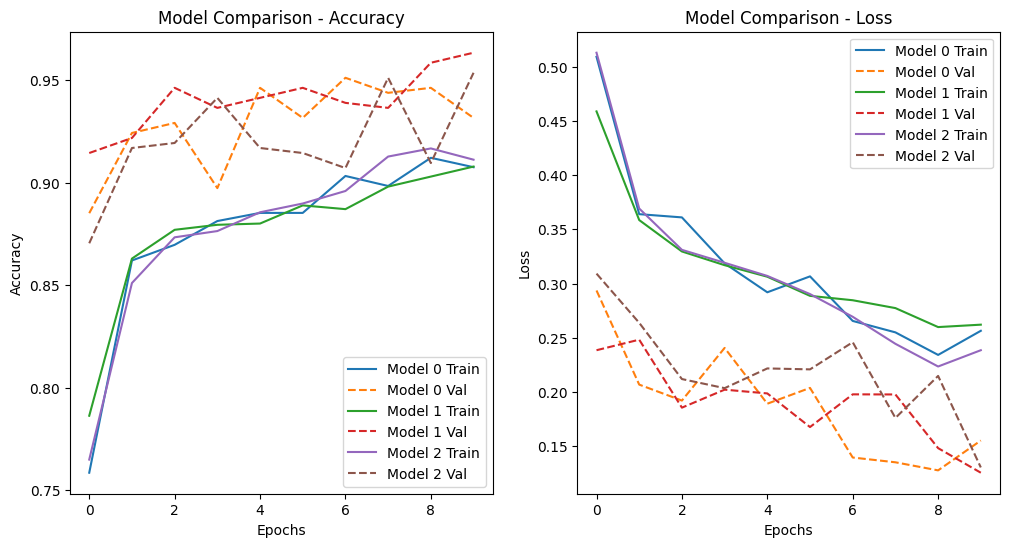

In [ ]:
# Define model configurations
model_configs = [
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 16, "optimizer": Adam, "name": "Model 0"},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 32, "optimizer": Adam, "name": "Model 1"},
    {"layers": [32, 64, 128, 128], "learning_rate": 0.001, "batch_size": 64, "optimizer": Adam, "name": "Model 2"}
]

models = []
histories = []
trained_models = []  # Store trained models for evaluation

for config in model_configs:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(2, 2))

    for filters in config["layers"][1:]:
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    optimizer = config["optimizer"](learning_rate=config["learning_rate"])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training {config['name']} with {config['optimizer'].__name__}, LR={config['learning_rate']}, Batch={config['batch_size']}...")
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=config["batch_size"])

    models.append(model)
    histories.append(history)
    trained_models.append(model)  # Store the trained model
    print(f"\n***************stored the model{i}...********************\n")

# ====================  PLOT COMPARISON ====================
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Comparison - Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"{model_configs[i]['name']} Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{model_configs[i]['name']} Val")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Comparison - Loss')

plt.show()


In [ ]:
test_accuracies = []

for i, model in enumerate(trained_models):
    print(f"\nEvaluating Model {i} on Test Data...\n")
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    test_accuracies.append(test_acc)
    print(f"Model {i} - Test Accuracy: {test_acc:.4f}")




Evaluating Model 0 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9581 - loss: 0.1271
Model 0 - Test Accuracy: 0.9463

Evaluating Model 1 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9354 - loss: 0.1898
Model 1 - Test Accuracy: 0.9390

Evaluating Model 2 on Test Data...

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9632 - loss: 0.1045
Model 2 - Test Accuracy: 0.9610


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.6032 - loss: 0.6376 - val_accuracy: 0.8484 - val_loss: 0.3573
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8478 - loss: 0.3908 - val_accuracy: 0.9218 - val_loss: 0.2073
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8688 - loss: 0.3526 - val_accuracy: 0.9193 - val_loss: 0.2352
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.8682 - loss: 0.3267 - val_accuracy: 0.9340 - val_loss: 0.1971
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.8843 - loss: 0.3256 - val_accuracy: 0.9462 - val_loss: 0.1700
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.8941 - loss: 0.2865 - val_accuracy: 0.9389 - val_loss: 0.1996
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9017 - loss: 0.2731 - val_accuracy: 0.9315 - val_loss: 0.1878
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9013 - loss: 0

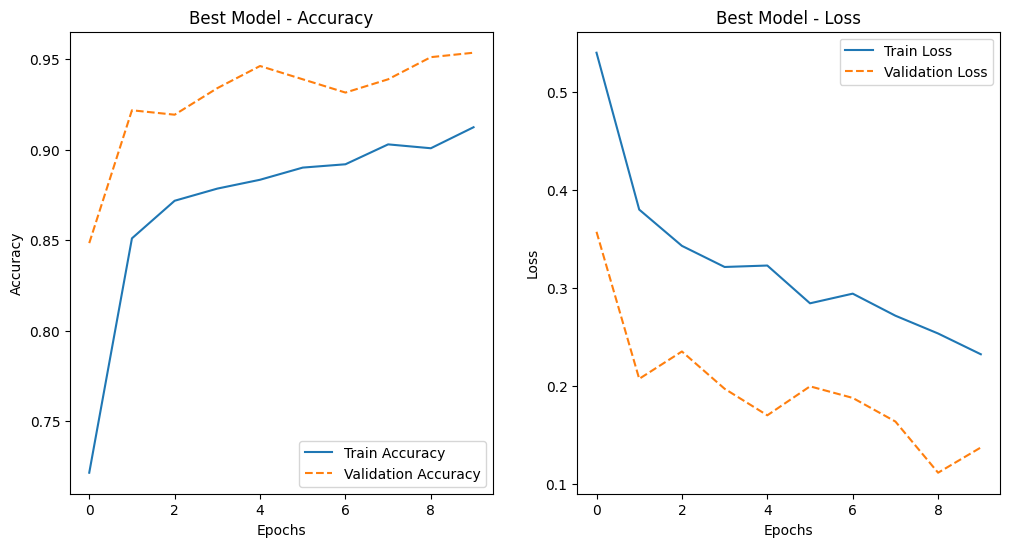

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

IMG_SIZE = 128
learning_rate = 0.001
batch_size = 64

# Build the best model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model with RMSprop optimizer
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=batch_size)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nBest Model Test Accuracy: {test_accuracy:.4f}")

# Plot Accuracy & Loss
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='dashed', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Best Model - Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], linestyle='dashed', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Best Model - Loss')

plt.show()
